In [30]:
import pandas as pd
file_path = '/content/heart.csv'
heart_data = pd.read_csv(file_path)
heart_data.head(5)
heart_data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
Logistic Regression Accuracy: 0.88
              precision    recall  f1-score   support

           0       0.84      0.89      0.86        74
           1       0.92      0.87      0.89       101

    accu

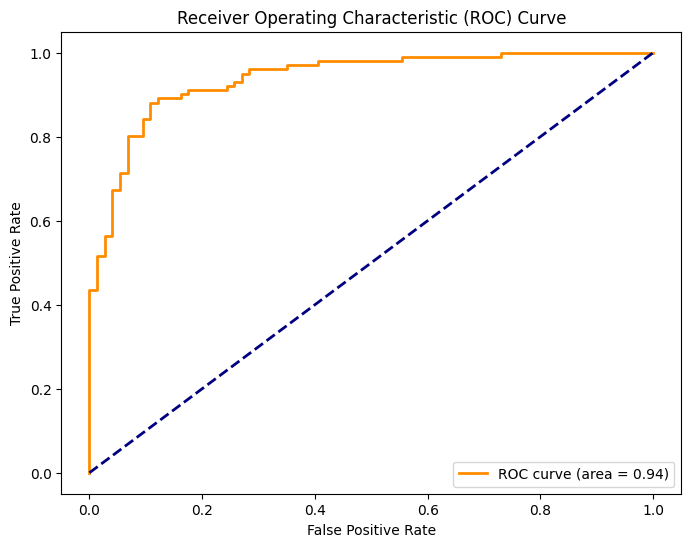

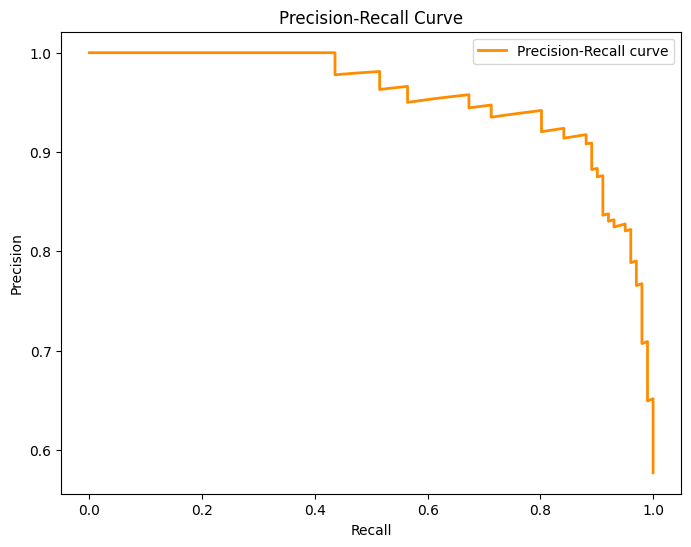

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, precision_recall_curve, auc



# Display the first few rows of the dataset to understand its structure
print(heart_data.head())

# Select relevant features
features = ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope']

# Drop any irrelevant columns
heart_data = heart_data[features + ['HeartDisease']]

# Handle missing values
# For numerical features, use mean imputation
numeric_features = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# For categorical features, use constant imputation
categorical_features = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Impute missing values and transform the data
X = preprocessor.fit_transform(heart_data.drop('HeartDisease', axis=1))
y = heart_data['HeartDisease']

# Handle outliers using Isolation Forest
iso_forest = IsolationForest(contamination=0.05)  # Adjust the contamination parameter as needed
outlier_mask = iso_forest.fit_predict(X) != -1

# Apply the outlier mask
X = X[outlier_mask]
y = y[outlier_mask]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with the preprocessor and Logistic Regression model
model = Pipeline(steps=[
    ('classifier', LogisticRegression())
])

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

# ROC curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()


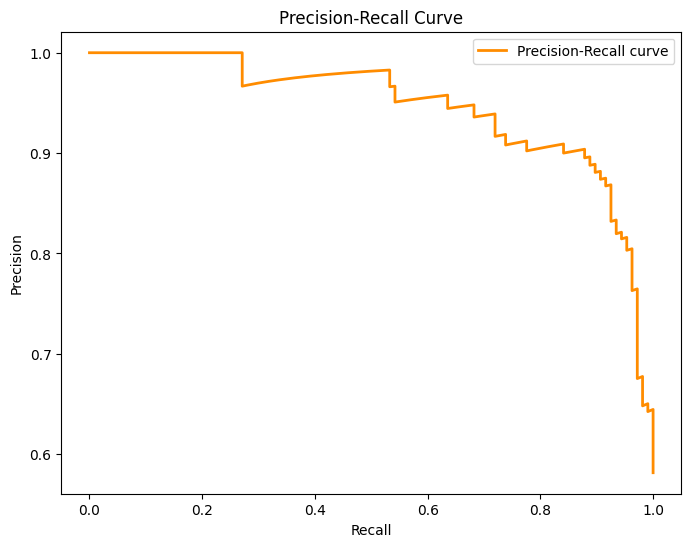

In [23]:
# Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()

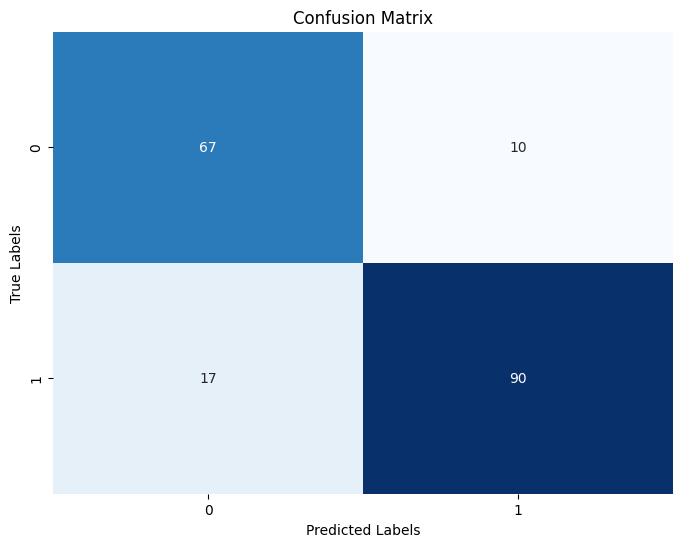

In [12]:
import seaborn as sns

# Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [15]:
import joblib
joblib.dump(model, 'heart_disease_model.pkl')

['heart_disease_model.pkl']

In [19]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

# Assuming you have a trained model saved as 'heart_disease_model.pkl'
model_path = '/content/heart_disease_model.pkl'

# Load the model
model = joblib.load(model_path)

# Assuming you have new data in a DataFrame called 'new_data'
# Make sure 'new_data' has the same features used during training
# Drop the target variable if it's present
heart_data = heart_data.drop('HeartDisease', axis=1, errors='ignore')

# Use the model for prediction
predictions = model.predict(heart_data)

# Display the predictions
print(predictions)


[0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 1
 0 0 1 0 0 0 0 1 1 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0
 1 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0
 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 1 1 1 1 1 0 0 0 0 0
 0 1 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 0
 1 0 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 1 1
 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0 1 0 0 1 0 0 0 0
 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 0 1 0 1 1 1 1
 1 0 1 1 1 0 1 0 1 1 1 1 

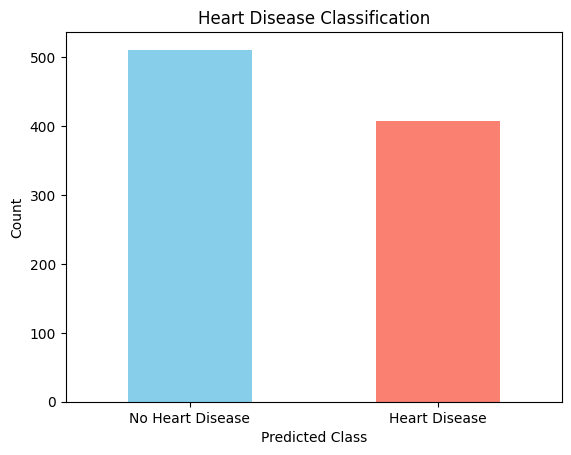

In [21]:
# Display the predictions using a bar plot
prediction_counts = pd.Series(predictions).value_counts()
prediction_counts.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Heart Disease Classification')
plt.xlabel('Predicted Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No Heart Disease', 'Heart Disease'], rotation=0)
plt.show()

In [22]:
# Collect input samples from the user
user_input = {}
user_input['Age'] = float(input('Enter Age: '))
user_input['Sex'] = input('Enter Sex (Male/Female): ')
user_input['ChestPainType'] = input('Enter Chest Pain Type (Typical Angina/Atypical Angina/Non-anginal Pain/Asymptomatic): ')
user_input['RestingBP'] = float(input('Enter Resting Blood Pressure: '))
user_input['Cholesterol'] = float(input('Enter Cholesterol: '))
user_input['FastingBS'] = float(input('Enter Fasting Blood Sugar Level: '))
user_input['RestingECG'] = input('Enter Resting Electrocardiographic Results (Normal/ST-T wave abnormality/Left ventricular hypertrophy): ')
user_input['MaxHR'] = float(input('Enter Maximum Heart Rate Achieved: '))
user_input['ExerciseAngina'] = input('Enter Exercise-Induced Angina (Yes/No): ')
user_input['Oldpeak'] = float(input('Enter ST Depression Induced by Exercise Relative to Rest: '))
user_input['ST_Slope'] = input('Enter Slope of the Peak Exercise ST Segment (Upsloping/Flat/Downsloping): ')

# Create a DataFrame from the user input
user_df = pd.DataFrame([user_input])

# Use the model for prediction
prediction = model.predict(user_df)

# Display the prediction
if prediction[0] == 0:
    print('Prediction: No Heart Disease')
else:
    print('Prediction: YES its Heart Disease')

Enter Age: 45
Enter Sex (Male/Female): male
Enter Chest Pain Type (Typical Angina/Atypical Angina/Non-anginal Pain/Asymptomatic): Asymptomatic
Enter Resting Blood Pressure: 99
Enter Cholesterol: 45
Enter Fasting Blood Sugar Level: 100
Enter Resting Electrocardiographic Results (Normal/ST-T wave abnormality/Left ventricular hypertrophy): 125
Enter Maximum Heart Rate Achieved: 145
Enter Exercise-Induced Angina (Yes/No): No
Enter ST Depression Induced by Exercise Relative to Rest: 55
Enter Slope of the Peak Exercise ST Segment (Upsloping/Flat/Downsloping): Flat
Prediction: Heart Disease
